# Pew Research Survey Data
## Activity

1. Download a data file from the Pew Center. Copy the file to your Drive and read it into a data object.
2. Create a crosstabulation and a visualization to depict the relationship between a demographic variable and an attitudinal variable.
3. Create a linear model to predict the attitudinal variable.
4. Interpret the results.

In [5]:
!pip install pyreadstat
!pip install researchpy

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt 
import researchpy as rp

## [American Trends Panel Wave 42](https://www.pewresearch.org/science/dataset/american-trends-panel-wave-42/)

Asking two main questions with specific follow-ups:
* PAST – Compared with twenty years ago, do you think developments in science have made
people’s lives… Better, Worse, About the same, No answer.

* FUTURE – Looking ahead to the next twenty years, do you think developments in science will make
people’s lives… Better, Worse, About the same, No answer.

In [31]:
ATP_W42 = pd.read_spss('data/ATP-W42.sav')
ATP_W42.head()

,QKEY,Device_Type_W42,LANG_W42,FORM_W42,PAST_W42,FUTURE_W42,DOV_FUTURE_W42,FUTURE_BOE_OE1_W42,FUTURE_BOE_OE2_W42,FUTURE_BOE_OE3_W42,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W42
0,100363.0,Mobile phone,English,Form 1,Better,Better,DOV_FUTURE 1,Advances in health care and medicine,Surgical techniques,NaN,...,Democrat,NaN,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Accesses Internet by paying a cell phone compa...,No,0.575440
1,101224.0,Mobile phone,English,Form 1,Worse,Worse,DOV_FUTURE 1,No answer,NaN,NaN,...,Republican,NaN,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Accesses Internet by paying a cell phone compa...,Yes,0.271687
2,101437.0,Desktop,English,Form 2,NaN,NaN,NaN,NaN,NaN,NaN,...,Republican,NaN,Rep/Lean Rep,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Accesses Internet by paying a cell phone compa...,No,0.568512
3,101493.0,Mobile phone,English,Form 2,NaN,NaN,NaN,NaN,NaN,NaN,...,Republican,NaN,Rep/Lean Rep,"$75,000 to less than $100,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Accesses Internet by paying a cell phone compa...,No,0.342295
4,102130.0,Mobile phone,English,Form 1,About the same,Better,DOV_FUTURE 2,NaN,NaN,NaN,...,Independent,Refused,DK/Refused/No lean,Refused,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses Internet by paying a cell phone compa...,Yes,0.105145


## Values for comparison
Does political party affiliation impact attitudes on scientific developments' influence on people's lives in the past or future?
How about income?

In [32]:
# PAST Compared with twenty years ago, do you think developments in science have made people’s lives…
# Better, Worse, About the same, No answer
ATP_W42['PAST_W42']

0               Better
1                Worse
2                  NaN
3                  NaN
4       About the same
             ...      
4459               NaN
4460            Better
4461               NaN
4462            Better
4463               NaN
Name: PAST_W42, Length: 4464, dtype: category
Categories (4, object): ['About the same', 'Better', 'Refused', 'Worse']

In [33]:
# PAST
# Substituting 'Refused' values with NaN
ATP_W42['PAST_W42r'] = np.where(ATP_W42['PAST_W42'].str.contains('Refused'), np.nan, ATP_W42['PAST_W42'])
ATP_W42['PAST_W42r']

/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_46539/1227186890.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ATP_W42['PAST_W42r'] = np.where(ATP_W42['PAST_W42'].str.contains('Refused'), np.nan, ATP_W42['PAST_W42'])


0               Better
1                Worse
2                  NaN
3                  NaN
4       About the same
             ...      
4459               NaN
4460            Better
4461               NaN
4462            Better
4463               NaN
Name: PAST_W42r, Length: 4464, dtype: object

In [34]:
# FUTURE Looking ahead to the next twenty years, do you think developments in science will make people’s lives…
# Better, Worse, About the same, No answer
ATP_W42['FUTURE_W42']

0       Better
1        Worse
2          NaN
3          NaN
4       Better
         ...  
4459       NaN
4460    Better
4461       NaN
4462    Better
4463       NaN
Name: FUTURE_W42, Length: 4464, dtype: category
Categories (4, object): ['About the same', 'Better', 'Refused', 'Worse']

In [35]:
# FUTURE
ATP_W42['FUTURE_W42r'] = np.where(ATP_W42['FUTURE_W42'].str.contains('Refused'), np.nan, ATP_W42['FUTURE_W42'])
ATP_W42['FUTURE_W42r']

/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_46539/1747425837.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ATP_W42['FUTURE_W42r'] = np.where(ATP_W42['FUTURE_W42'].str.contains('Refused'), np.nan, ATP_W42['FUTURE_W42'])


0       Better
1        Worse
2          NaN
3          NaN
4       Better
         ...  
4459       NaN
4460    Better
4461       NaN
4462    Better
4463       NaN
Name: FUTURE_W42r, Length: 4464, dtype: object

In [36]:
ATP_W42['F_PARTY_FINAL']

0             Democrat
1           Republican
2           Republican
3           Republican
4          Independent
             ...      
4459    Something else
4460          Democrat
4461       Independent
4462          Democrat
4463    Something else
Name: F_PARTY_FINAL, Length: 4464, dtype: category
Categories (5, object): ['Democrat', 'Independent', 'Refused', 'Republican', 'Something else']

In [37]:
# PARTY
ATP_W42['F_PARTY_FINALr'] = np.where(ATP_W42['F_PARTY_FINAL'].str.contains('Refused'), np.nan, ATP_W42['F_PARTY_FINAL'])
ATP_W42['F_PARTY_FINALr']

/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_46539/942172251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ATP_W42['F_PARTY_FINALr'] = np.where(ATP_W42['F_PARTY_FINAL'].str.contains('Refused'), np.nan, ATP_W42['F_PARTY_FINAL'])


0             Democrat
1           Republican
2           Republican
3           Republican
4          Independent
             ...      
4459    Something else
4460          Democrat
4461       Independent
4462          Democrat
4463    Something else
Name: F_PARTY_FINALr, Length: 4464, dtype: object

In [38]:
ATP_W42['F_INCOME']

0       $100,000 to less than $150,000
1         $40,000 to less than $50,000
2         $10,000 to less than $20,000
3        $75,000 to less than $100,000
4                              Refused
                     ...              
4459      $10,000 to less than $20,000
4460      $20,000 to less than $30,000
4461     $75,000 to less than $100,000
4462    $100,000 to less than $150,000
4463     $75,000 to less than $100,000
Name: F_INCOME, Length: 4464, dtype: category
Categories (10, object): ['$10,000 to less than $20,000', '$100,000 to less than $150,000', '$150,000 or more', '$20,000 to less than $30,000', ..., '$50,000 to less than $75,000', '$75,000 to less than $100,000', 'Less than $10,000', 'Refused']

In [39]:
ATP_W42['F_INCOMEr'] = np.where(ATP_W42['F_INCOME'].str.contains('Refused'), np.nan, ATP_W42['F_INCOME'])
ATP_W42['F_INCOMEr']

/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_46539/549022954.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ATP_W42['F_INCOMEr'] = np.where(ATP_W42['F_INCOME'].str.contains('Refused'), np.nan, ATP_W42['F_INCOME'])


0       $100,000 to less than $150,000
1         $40,000 to less than $50,000
2         $10,000 to less than $20,000
3        $75,000 to less than $100,000
4                                  NaN
                     ...              
4459      $10,000 to less than $20,000
4460      $20,000 to less than $30,000
4461     $75,000 to less than $100,000
4462    $100,000 to less than $150,000
4463     $75,000 to less than $100,000
Name: F_INCOMEr, Length: 4464, dtype: object

### Attitudes toward Past and Future Scientific Developments Influenced by Political Party Affiliation

There does not appear to be significant correlation between attitudes toward science's impact on the past or future with respect to party affliation. 85-88% of Democrats, Republicans, and Independents believed science has made people's lives better in the past twenty years, as well, 82-87% believe science will make people's lives better in the next twenty years. 

In [40]:
# PARTY TO PAST
crosstab, sigtab = rp.crosstab(ATP_W42['PAST_W42r'], ATP_W42['F_PARTY_FINALr'], prop='col', test='chi-square')
crosstab

F_PARTY_FINALr                                              
F_PARTY_FINALr       Democrat Independent Republican Something else     All
PAST_W42r                                                                  
About the same           9.49        9.70       9.64          16.23   10.40
Better                  87.64       85.45      87.31          78.11   85.86
Worse                    2.87        4.85       3.05           5.66    3.74
All                    100.00      100.00     100.00         100.00  100.00

In [45]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,68.3484
1,p-value =,0.0000
2,Cramer's V =,0.1266


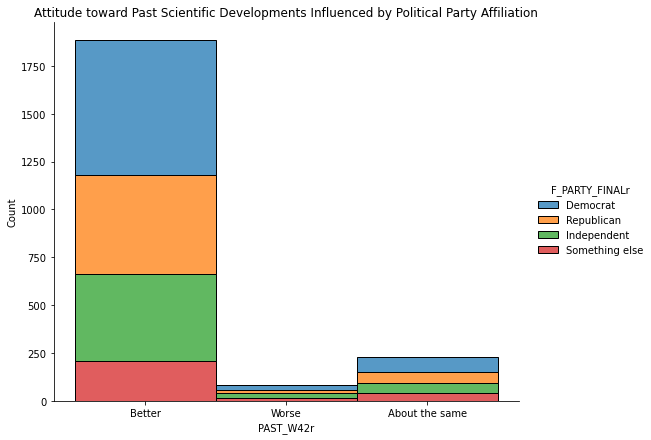

In [47]:
p = sb.displot(ATP_W42, x='PAST_W42r', hue='F_PARTY_FINALr', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Past Scientific Developments Influenced by Political Party Affiliation')
plt.show()

In [48]:
# PARTY TO FUTURE
crosstab, sigtab = rp.crosstab(ATP_W42['FUTURE_W42r'], ATP_W42['F_PARTY_FINALr'], prop='col', test='chi-square')
crosstab

F_PARTY_FINALr                                              
F_PARTY_FINALr       Democrat Independent Republican Something else     All
FUTURE_W42r                                                                
About the same           7.99       11.21      10.87          13.31   10.19
Better                  87.02       81.31      82.34          79.85   83.50
Worse                    4.99        7.48       6.79           6.84    6.31
All                    100.00      100.00     100.00         100.00  100.00

In [49]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,12.8261
1,p-value =,0.0459
2,Cramer's V =,0.0541


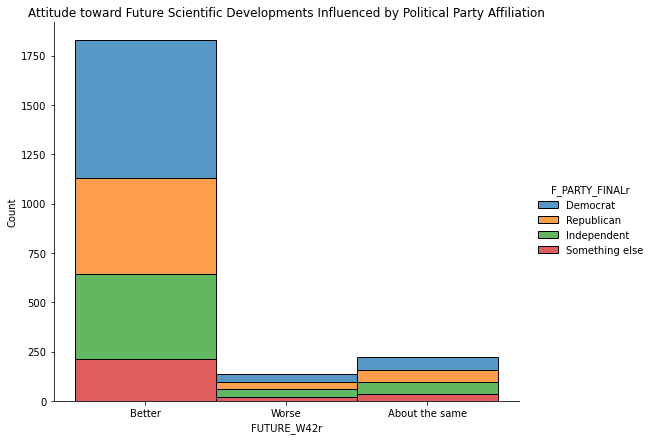

In [50]:
p = sb.displot(ATP_W42, x='FUTURE_W42r', hue='F_PARTY_FINALr', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Future Scientific Developments Influenced by Political Party Affiliation')
plt.show()

### Attitudes toward Past and Future Scientific Developments Influenced by Income

With income, we can see a steady decline in positive attitudes toward the influence of science on the past and future as personal income declines. 92% of those with an income of $150,000 or greater believed that due to science things have gotten better in the past twenty years. As the income brackets decrease there is a steady decrease in this attitude down to 72% for those with a personal income of $10,000 or lower. Similar attitude changes across income brackets are seen toward the future of science's influcence starting at 92% for the highest income bracket and down to 66% for the lowest income bracket.

In [75]:
# INCOME TO PAST
income = ['$150,000 or more', '$100,000 to less than $150,000', '$75,000 to less than $100,000', '$50,000 to less than $75,000', '$40,000 to less than $50,000', '$30,000 to less than $40,000', '$20,000 to less than $30,000', '$10,000 to less than $20,000',  'Less than $10,000']
crosstab, sigtab = rp.crosstab(ATP_W42['PAST_W42r'], ATP_W42['F_INCOMEr'], prop='col', test='chi-square')
table = crosstab['F_INCOMEr']
table = table[income]
table

F_INCOMEr,"$150,000 or more","$100,000 to less than $150,000","$75,000 to less than $100,000","$50,000 to less than $75,000","$40,000 to less than $50,000","$30,000 to less than $40,000","$20,000 to less than $30,000","$10,000 to less than $20,000","Less than $10,000"
PAST_W42r,,,,,,,,,
About the same,5.53,3.49,5.74,10.34,9.50,14.49,12.79,14.98,19.08
Better,91.96,92.64,90.98,87.27,87.78,81.31,84.02,79.74,72.25
Worse,2.51,3.88,3.28,2.39,2.71,4.21,3.20,5.29,8.67
All,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [52]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,68.3484
1,p-value =,0.0000
2,Cramer's V =,0.1266


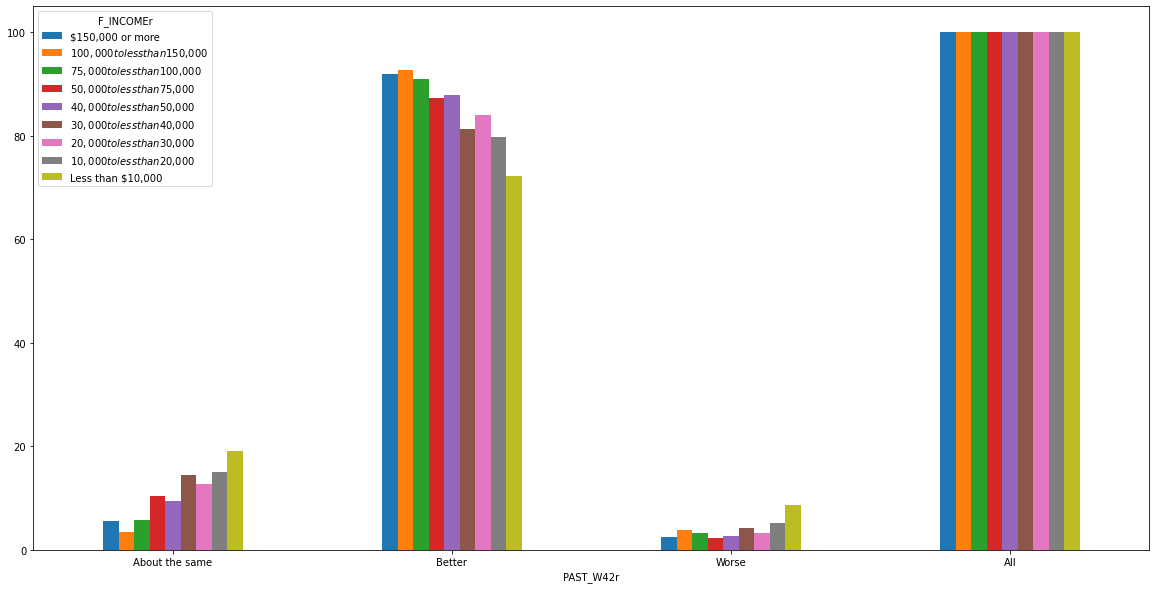

In [79]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
barplot = table.plot.bar(rot=0, ax=ax)

In [80]:
# INCOME TO FUTURE
crosstab, sigtab = rp.crosstab(ATP_W42['FUTURE_W42r'], ATP_W42['F_INCOMEr'], prop='col', test='chi-square')
crosstab
table = crosstab['F_INCOMEr']
table = table[income]
table

F_INCOMEr,"$150,000 or more","$100,000 to less than $150,000","$75,000 to less than $100,000","$50,000 to less than $75,000","$40,000 to less than $50,000","$30,000 to less than $40,000","$20,000 to less than $30,000","$10,000 to less than $20,000","Less than $10,000"
FUTURE_W42r,,,,,,,,,
About the same,6.06,6.98,7.38,9.55,9.95,10.75,12.84,12.83,19.88
Better,91.41,87.60,88.11,85.41,83.71,83.18,80.73,78.32,66.08
Worse,2.53,5.43,4.51,5.04,6.33,6.07,6.42,8.85,14.04
All,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [82]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,61.9524
1,p-value =,0.0000
2,Cramer's V =,0.1207


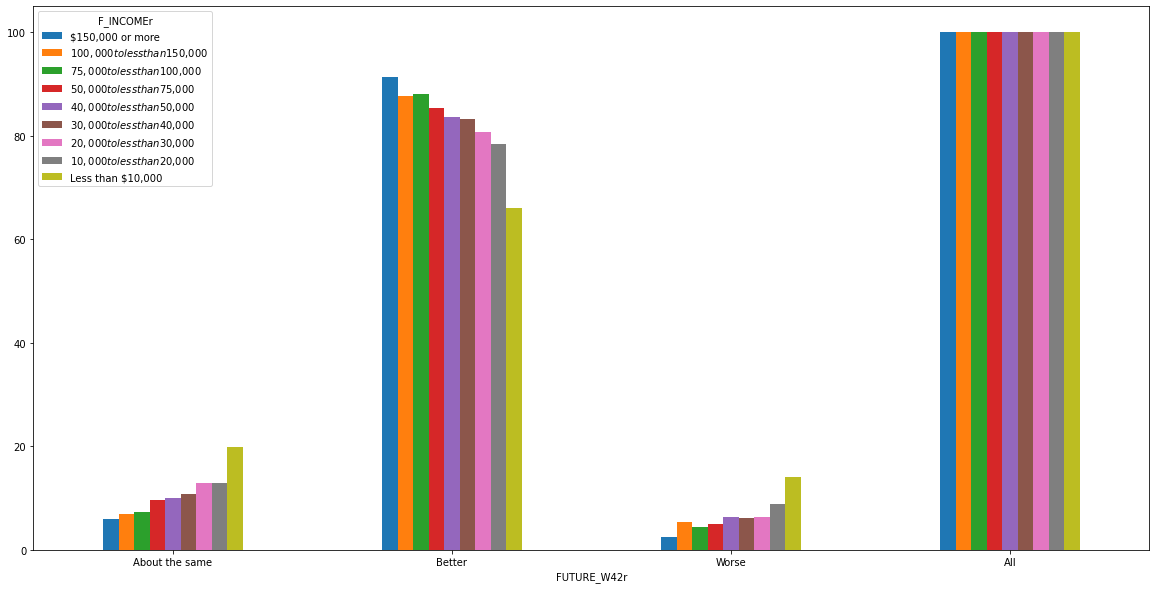

In [81]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
barplot = table.plot.bar(rot=0, ax=ax)

In [86]:
Science_df = pd.read_spss('data/ATP-W42.sav', usecols=['PAST_W42', 'FUTURE_W42', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT', 'F_HISP', 'F_RACECMB', 'F_ATTEND', 'F_BORN', 'F_PARTY_FINAL', 'F_INCOME', 'F_IDEO'], convert_categoricals=False)
Science_df

,PAST_W42,FUTURE_W42,F_AGECAT,F_SEX,F_EDUCCAT,F_HISP,F_RACECMB,F_BORN,F_ATTEND,F_PARTY_FINAL,F_INCOME,F_IDEO
0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,8.0,4.0
1,2.0,2.0,4.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,5.0,2.0
2,NaN,NaN,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0
3,NaN,NaN,3.0,1.0,2.0,1.0,1.0,2.0,6.0,1.0,7.0,2.0
4,3.0,1.0,3.0,2.0,1.0,2.0,4.0,2.0,1.0,3.0,99.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,NaN,NaN,2.0,2.0,1.0,2.0,1.0,NaN,6.0,4.0,2.0,4.0
4460,1.0,1.0,4.0,2.0,3.0,2.0,1.0,2.0,4.0,2.0,3.0,3.0
4461,NaN,NaN,3.0,2.0,2.0,2.0,1.0,NaN,6.0,3.0,7.0,3.0
4462,1.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,8.0,4.0


### Predicting attitudes toward the past and future influence of science on people's lives based on various demographic variables

Less than 1% of the variation of people's attitudes toward the influence of science on the past and future can be explained by the combination of demographic variables studied – young, women, college education, black, latinx, churchgoer, born-again christians, and republicans. 

The are some positive and negative attitudinal variations between demographics with 'church goers' being the most skeptical of science's influence and 'republicans' being the most positive.

In [87]:
# Create some binary vectors to identify demographic characteristics to model.
# You can do this manually:
Science_df['young'] = 0
Science_df.loc[Science_df['F_AGECAT'] == 1, ['young']] = 1 

Science_df['women'] = 0
Science_df.loc[Science_df['F_SEX'] == 2, ['women']] = 1 

Science_df['college'] = 0
Science_df.loc[Science_df['F_EDUCCAT'] == 1, ['college']] = 1 

Science_df['black'] = 0
Science_df.loc[Science_df['F_RACECMB'] == 2, ['black']] = 1 

Science_df['latinx'] = 0
Science_df.loc[Science_df['F_HISP'] == 1, ['latinx']] = 1 

Science_df['churchgoer'] = 0
Science_df.loc[Science_df['F_ATTEND'] < 3, ['churchgoer']] = 1 

Science_df['bornagain'] = 0
Science_df.loc[Science_df['F_BORN'] == 1, ['bornagain']] = 1 

Science_df['republican'] = 0
Science_df.loc[Science_df['F_PARTY_FINAL'] == 1, ['republican']] = 1 

In [93]:
# Linear model to predict belief in postive influence of science on the past
Y = Science_df['PAST_W42'] # A higher score indicates more skepticism of science's positive influence on the past
X = Science_df[['young', 'women', 'college', 'black', 'latinx', 'churchgoer', 'bornagain', 'republican', 'F_INCOME']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               PAST_W42   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.590
Date:                Wed, 19 Oct 2022   Prob (F-statistic):              0.113
Time:                        14:06:49   Log-Likelihood:                -6027.8
No. Observations:                2226   AIC:                         1.208e+04
Df Residuals:                    2216   BIC:                         1.213e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3239      0.167      7.924      0.0

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
# Linear model to predict belief in postive influence of science on the future
Y = Science_df['FUTURE_W42'] # A higher score indicates more skepticism of science's positive influence on the future
X = Science_df[['young', 'women', 'college', 'black', 'latinx', 'churchgoer', 'bornagain', 'republican', 'F_INCOME']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:             FUTURE_W42   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.400
Date:                Wed, 19 Oct 2022   Prob (F-statistic):              0.182
Time:                        13:26:35   Log-Likelihood:                -7225.8
No. Observations:                2226   AIC:                         1.447e+04
Df Residuals:                    2216   BIC:                         1.453e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5838      0.286      5.534      0.0

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
